# Proyecto 1 - Edgar Gerardo Alarcón González

## Predicción de precio de ventas por regresiones

### Carga de librerías

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

### A. Carga de datos

#### Entrenamiento

In [2]:
train = pd.read_csv(r"C:\Users\alarc\OneDrive\Documents\Programming\Python\Jupyter\Inteligencia Artificial\Proyecto 1\house-prices-advanced-regression-techniques/train.csv",
                    index_col="Id")

#### Prueba

In [3]:
test = pd.read_csv(r"C:\Users\alarc\OneDrive\Documents\Programming\Python\Jupyter\Inteligencia Artificial\Proyecto 1\house-prices-advanced-regression-techniques/test.csv",
                    index_col="Id")

#### Sample Submission

In [4]:
sample = pd.read_csv(r"C:\Users\alarc\OneDrive\Documents\Programming\Python\Jupyter\Inteligencia Artificial\Proyecto 1\house-prices-advanced-regression-techniques/sample_submission.csv",
                    index_col="Id")

### B. Correlación de los datos

Primeramente vamos a hacer énfasis que nosotros trabajaremos con variables explicativas que sean totalmente numéricas, existe una gran cantidad de variables categóricas que presenta la información, sin embargo, con la finalidad de mantener un tanto de parsimonía en el modelo, simplemente ubicaremos a las variables que sean numéricas. Vamos a ver la correlación que tiene toda la tabla de entrenamiento, que es con la que alimentaremos el modelo.

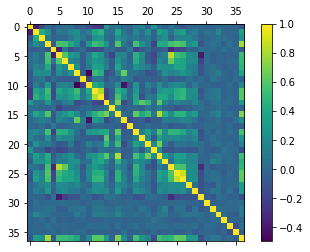

In [5]:
# Gráfico con leyendas
figure = plt.figure() 
axes = figure.add_subplot(111) 
# using the matshow() function  
caxes = axes.matshow(train.corr()) 
figure.colorbar(caxes) 
# Hacemos el gráfico  
plt.show() 

Notemos que en general la mayoría de las variables que estamos trabajando no guardan multicolinealidad. Lo que haremos a continuación es buscar las variables explicativas que guarden una correlación mayor con la respuesta, $\texttt{"PriceSales"}$. Para esto, filtraremos las variables explicativas tales que guarden una correlación mayor que 0.6 con la respuesta.

In [6]:
MC=train.corr()
SaleCorr=abs(MC.loc[:,"SalePrice"])
aux=SaleCorr.sort_values(ascending=False)
Explicativas=aux.index[aux>0.6]
train_selec = train[Explicativas]

Veamos un gráfico de la correlación con las variables que hemos extraido.

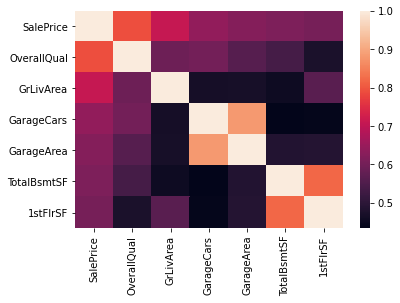

In [7]:
sns.heatmap(train_selec.corr())

Vemos que hay mucha multicolinealidad entre algunas de las parejas de variables $\texttt{"GarageCars"-"GarageArea"}$ y $\texttt{"TotalBsmtSF"-"1stFlrSF"}$. Para evitar la multicolinealidad vamos a extraer estas variables.

In [8]:
train_selec=train_selec.drop(columns=['GarageCars', '1stFlrSF'])

Y veamos entonces el gráfico resultante con las variables seleccionadas.

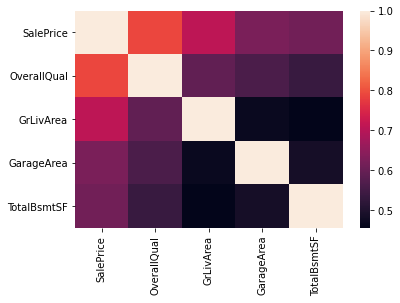

In [9]:
sns.heatmap(train_selec.corr())

Vamos a guardar en los objetos $\texttt{X}$ y $\texttt{y}$ las variables explicativas y la respuesta, respectivamente.

In [10]:
X = train_selec.drop(columns=['SalePrice'])
y = train_selec['SalePrice']

### C. Creación de Modelos

Aquí vamos a hacer la creación de los modelos, los cuales vamos a alimentar con los objetos anteriores. Adicionalmente, vamos a mostrar, los coeficientes del modelo y estadísticas de las variables respuesta obtenidas.

#### C.1. Modelo Lineal

In [11]:
linear_model = LinearRegression(normalize=False,fit_intercept=True)
linear_model.fit(X,y)
y_linear=linear_model.predict(X)
aux=stats.describe(y_linear)
df = pd.DataFrame([aux], columns=aux._fields)
df.round(3)

,nobs,minmax,mean,variance,skewness,kurtosis
0,1460,"(-59644.12391656727, 673805.9903350528)",180921.196,4.779432e+09,0.75,2.277


In [12]:
aux=linear_model.coef_
df = pd.DataFrame([aux],columns=X.columns)
print(df.round(3))

   OverallQual  GrLivArea  GarageArea  TotalBsmtSF
0    24954.711     45.628      58.246       30.126


#### C.2. Modelo Lasso

In [13]:
lasso_model = Lasso(alpha=0.5,normalize=True, max_iter=1e6)
lasso_model.fit(X,y)
y_lasso=lasso_model.predict(X)
aux=stats.describe(y_lasso)
df = pd.DataFrame([aux], columns=aux._fields)
df.round(3)

,nobs,minmax,mean,variance,skewness,kurtosis
0,1460,"(-59572.62003024666, 673583.0638959827)",180921.196,4.776324e+09,0.75,2.276


In [14]:
aux=lasso_model.coef_
df = pd.DataFrame([aux],columns=X.columns)
df.round(3)

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF
0,24952.937,45.611,58.202,30.105


#### C.3. Modelo Ridge

In [15]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X,y) 
y_ridge=ridge_model.predict(X)
aux=stats.describe(y_ridge)
df = pd.DataFrame([aux], columns=aux._fields)
df.round(3)

,nobs,minmax,mean,variance,skewness,kurtosis
0,1460,"(-59623.34441928893, 673854.5705534369)",180921.196,4.779005e+09,0.751,2.278


In [16]:
aux=ridge_model.coef_
df = pd.DataFrame([aux],columns=X.columns)
df.round(3)

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF
0,24945.847,45.636,58.262,30.133


De donde vemos que los resultados son bastante similares entre todos los modelos.

### D. Preparando la información

En esta parte, vamos a procesar la tabla $\texttt{test}$ para que que podamos utilizar las variables explicativas que estamos manejando y también quitando los datos que no sean aceptables para realizar un modelo como los que hicimos arriba.

In [17]:
# Filtramos las covariables que vamos a utilizar
test_selec = test[X.columns]
# Procedemos a quitar algunos datos faltantes.
is_NaN = test_selec.isnull()
row_has_NaN = is_NaN.any(axis=1)
# Nos quedamos con las que NO son NA
test_selec = test_selec[~row_has_NaN]
Xs = test_selec[~row_has_NaN]
ys = sample[~row_has_NaN]
ysd=ys.describe()

<ipython-input-17-4f8374e6896f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Xs = test_selec[~row_has_NaN]


### E. Implementación de los modelos

En esta sección lo que haremos será poner a prueba los modelos propuestos. 

En las secciones E.X.A vamos a estar probando los modelos con el conjunto de entrenamiento, esto significa que vamos a pronosticar las respuestas con base en el modelo lineal apoyado por las variables explicativas y las vamos a comparar con las respuestas originales en un gráfico, donde esperaríamos ver la identidad lo más similarmente posible, esto estaría indicando un pronóstico adecuado de la respuesta. Recordemos que esta información viene del archivo $\texttt{train.csv}$

Análogamente en las secciones E.X.B vamos a pronosticar las variables respuesta apoyados del archivo $\texttt{test.csv}$ donde vienen las variables explicativas y posteriormente vamos a comparar contra sus respuestas que se encuentran en el archivo $\texttt{sample_submission.csv}$.

#### E.1. Modelo Lineal

##### E.1.A Con el conjunto de entrenamiento

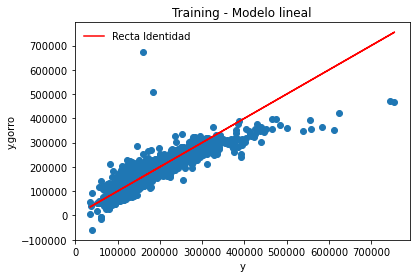

In [18]:
# Veamos entonces la comparación de la predicción con la real
plt.scatter(y,y_linear)
plt.plot(y, y, '-',color="red",label="Recta Identidad")
plt.title('Training - Modelo lineal')
plt.xlabel('y')
plt.ylabel('y.gorro')
plt.legend(loc='best', frameon=False)
plt.show()

##### E.1.B Con el conjunto de prueba

In [19]:
# Luego hacemos la predicción del modelo
ys_hat=linear_model.predict(Xs)
ys_hat=pd.DataFrame(data=ys_hat,columns=['Estimación Lineal - SalePrice'])

# Predicción de las variables
ys_hat.describe()

,Estimación Lineal - SalePrice
count,1457.000000
mean,178787.855710
std,68964.808539
min,-19814.786217
25%,130112.717854
50%,169966.058659
75%,218823.226244
max,602892.264690


In [20]:
# Variables 'reales'
ysd

,SalePrice
count,1457.000000
mean,179200.252105
std,16519.917177
min,135751.318893
25%,168715.950112
50%,179233.926374
75%,186818.610761
max,281643.976117


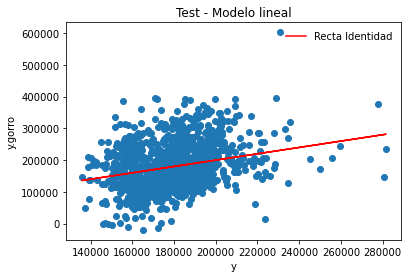

In [21]:
# Graficamos
plt.scatter(ys,ys_hat)
plt.plot(ys, ys, '-',color="red",label="Recta Identidad")
plt.title('Test - Modelo lineal')
plt.xlabel('y')
plt.ylabel('y.gorro')
plt.legend(loc='best', frameon=False)
plt.show()

#### E.2. Modelo Lasso

##### E.2.A Con el conjunto de entrenamiento

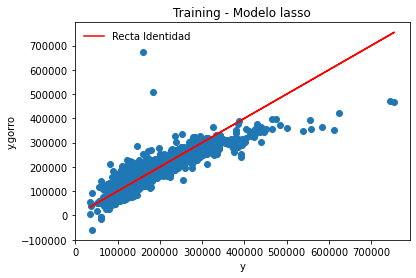

In [22]:
plt.scatter(y,y_lasso)
plt.plot(y, y, '-',color="red",label="Recta Identidad")
plt.title('Training - Modelo lasso')
plt.xlabel('y')
plt.ylabel('y.gorro')
plt.legend(loc='best', frameon=False)
plt.show()

##### E.2.B Con el conjunto de prueba

In [23]:
ys_hat=lasso_model.predict(Xs)
ys_hat=pd.DataFrame(data=ys_hat,columns=['Estimación Lasso - SalePrice'])

# Predicción de las variables
ys_hat.describe()

,Estimación Lasso - SalePrice
count,1457.000000
mean,178788.603430
std,68942.539066
min,-19750.334250
25%,130138.258460
50%,169967.986796
75%,218819.171776
max,602711.427950


In [24]:
# Variables 'reales'
ysd

,SalePrice
count,1457.000000
mean,179200.252105
std,16519.917177
min,135751.318893
25%,168715.950112
50%,179233.926374
75%,186818.610761
max,281643.976117


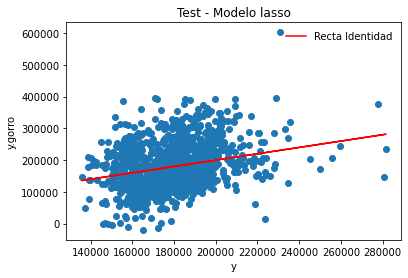

In [25]:
plt.scatter(ys,ys_hat)
plt.plot(ys, ys, '-',color="red",label="Recta Identidad")
plt.title('Test - Modelo lasso')
plt.xlabel('y')
plt.ylabel('y.gorro')
plt.legend(loc='best', frameon=False)
plt.show()

#### E.3. Modelo Ridge

##### E.3.A Con el conjunto de entrenamiento

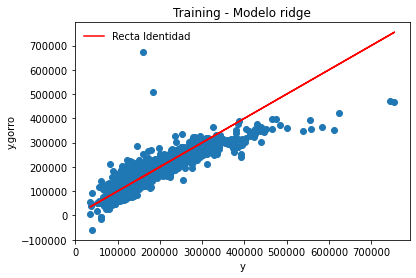

In [26]:
# Veamos entonces la comparación de la predicción con la real
plt.scatter(y,y_ridge)
plt.plot(y, y, '-',color="red",label="Recta Identidad")
plt.title('Training - Modelo ridge')
plt.xlabel('y')
plt.ylabel('y.gorro')
plt.legend(loc='best', frameon=False)
plt.show()

##### E.3.B Con el conjunto de prueba

In [27]:
ys_hat=ridge_model.predict(Xs)
ys_hat=pd.DataFrame(data=ys_hat,columns=['Estimación Ridge - SalePrice'])

# Predicción de las variables
ys_hat.describe()

,Estimación Ridge - SalePrice
count,1457.000000
mean,178787.701125
std,68961.032541
min,-19800.192947
25%,130103.144763
50%,169965.487691
75%,218817.682353
max,602925.268753


In [28]:
# Variables 'reales'
ysd

,SalePrice
count,1457.000000
mean,179200.252105
std,16519.917177
min,135751.318893
25%,168715.950112
50%,179233.926374
75%,186818.610761
max,281643.976117


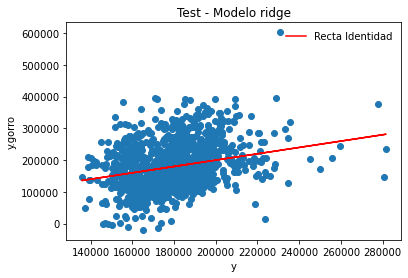

In [29]:
# Graficamos
plt.scatter(ys,ys_hat)
plt.plot(ys, ys, '-',color="red",label="Recta Identidad")
plt.title('Test - Modelo ridge')
plt.xlabel('y')
plt.ylabel('y.gorro')
plt.legend(loc='best', frameon=False)
plt.show()

### F. Conclusiones

Ciertamente los modelos guardan parsimonía al tener pocos parámetros para estimar además de ser explicados únicamente en términos de variables que son totalmente numéricas. Sin embargo,  aunque en el conjunto de entrenamiento parece funcionar de forma relativamente adecuada, parece que no se llega a modelar bien el comportamiento subyacente de los datos con este modelo, ya que presenta grandes diferencias a comparación de los precios que se encuentran en la tabla $\texttt{sample\_submission}$. Además, los modelos parecen no diferir mucho entre sí, de hecho cambian realmente muy poco, lo cual podemos ver en los siguientes gráficos.

#### F.1. Lineal Vs Lasso

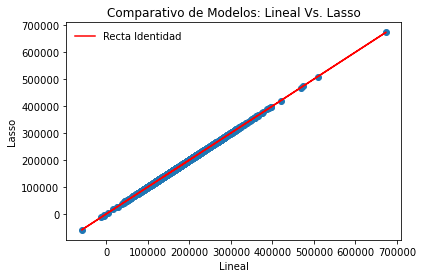

In [30]:
# Graficamos
plt.scatter(y_linear,y_lasso)
plt.plot(y_linear, y_linear, '-',color="red",label="Recta Identidad")
plt.title('Comparativo de Modelos: Lineal Vs. Lasso')
plt.xlabel('Lineal')
plt.ylabel('Lasso')
plt.legend(loc='best', frameon=False)
plt.show()

#### F.1. Lineal Vs Ridge

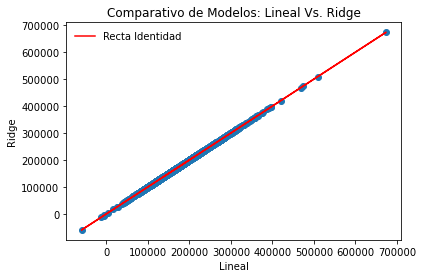

In [31]:
plt.scatter(y_linear,y_ridge)
plt.plot(y_linear, y_linear, '-',color="red",label="Recta Identidad")
plt.title('Comparativo de Modelos: Lineal Vs. Ridge')
plt.xlabel('Lineal')
plt.ylabel('Ridge')
plt.legend(loc='best', frameon=False)
plt.show()

#### F.1. Lasso Vs Ridge

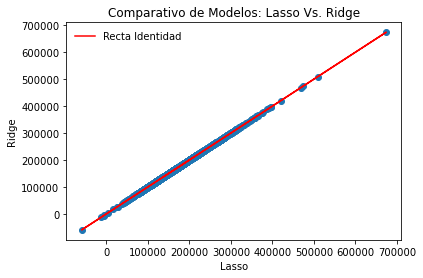

In [32]:
plt.scatter(y_lasso,y_ridge)
plt.plot(y_lasso, y_lasso, '-',color="red",label="Recta Identidad")
plt.title('Comparativo de Modelos: Lasso Vs. Ridge')
plt.xlabel('Lasso')
plt.ylabel('Ridge')
plt.legend(loc='best', frameon=False)
plt.show()

En conclusión, para obtener resultados más precisos, lo ideal sería experimentar con más variables respuesta y de esta manera buscar modelos que ajusten mejor desde el conjunto de entrenamiento.